In [61]:
!pip install -Uqq fastai duckduckgo_search

#why is this in the original?
#import os
#iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

#if iskaggle:
 #   !pip install -Uqq fastai duckduckgo_search
    
    
#where is ddg_images documented? https://pypi.org/project/duckduckgo-search/#3-images---image-search-by-duckduckgocom
from fastcore.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastai.vision.all import *
from duckduckgo_search import DDGS

In [62]:
# helpful functions to DRY

# need to make sure this is closed later on
def search_ddg(search_terms):
    ddgs = DDGS()
    return ddgs.images(
        keywords = search_terms,
        region="wt-wt",
        safesearch="moderate",
        type_image="photo",
    )

In [63]:
dolphins = search_ddg('dolphin')
manatees = search_ddg('manatee')
whales = search_ddg('whale')
turtles = search_ddg('turtle')
print(type(dolphins))

dolphin = next(dolphins)
manatee = next(manatees)
whale = next(whales)
turtle = next(turtles)

print(dolphin)
print(dolphin['image'])
print(manatee)
print(manatee['image'])
print(whale)
print(whale['image'])
print(turtle['image'])

<class 'generator'>
{'title': 'Dolphin 4k Ultra HD Wallpaper', 'image': 'https://images.alphacoders.com/293/293531.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.iEJ06_DV_5PHBbDWIZ6ZqQHaF1&pid=Api', 'url': 'https://wall.alphacoders.com/big.php?i=293531', 'height': 3781, 'width': 4800, 'source': 'Bing'}
https://images.alphacoders.com/293/293531.jpg
{'title': 'Encounters with Manatees in Crystal River, Florida - MilesGeek ️', 'image': 'https://images.milesgeek.com/wp-content/uploads/2017/04/manatee-with-rock-in-mouth-cgrant-visitcitrus.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.6EWugU1XrPi1AV1Ea625AAHaE6&pid=Api', 'url': 'https://www.milesgeek.com/encounters-manatees', 'height': 2848, 'width': 4288, 'source': 'Bing'}
https://images.milesgeek.com/wp-content/uploads/2017/04/manatee-with-rock-in-mouth-cgrant-visitcitrus.jpg
{'title': 'Fascinating Humpback Whale Facts', 'image': 'https://fthmb.tqn.com/l1vhEscfQQUiCi9W8ZpJ79vc144=/5200x3313/filters:fill(auto,1)/humpback-wh

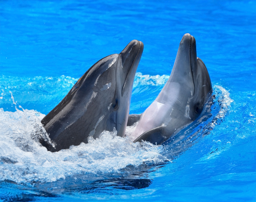

In [64]:
#how come if I put dolphim, whale, and manatee in the same block I only see one image?
dest = 'dolphin.jpg'
download_url(dolphin['image'], dest, show_progress=True)
img = Image.open(dest)
img.to_thumb(256,256)

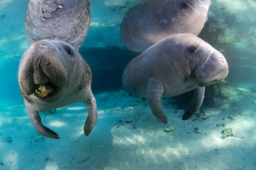

In [65]:
download_url(manatee['image'], 'manatee.jpg', show_progress=True)
Image.open('manatee.jpg').to_thumb(256,256)

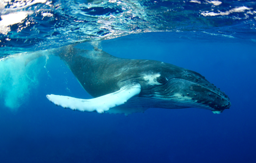

In [66]:
download_url(whale['image'], 'whale.jpg', show_progress=True)
Image.open('whale.jpg').to_thumb(256,256)

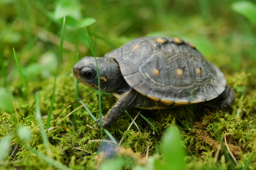

In [67]:
download_url(turtle['image'], 'turtle.jpg', show_progress=True)
Image.open('turtle.jpg').to_thumb(256,256)

In [68]:
def get_n_urls (generator, n):
    items=[]
    for i in range(n):
        try:
            items.append(next(generator)['image'])
        except StopIteration:
            break
    return items

In [69]:
image_gens=[dolphins, whales, manatees, turtles]
searches = 'dolphin', 'whale', 'manatee','turtle'
path = Path('training_images')

for category in searches:
    dest = (path/category)
    dest.mkdir(exist_ok=True, parents=True)
    for gen in image_gens:
        download_images(dest, urls=get_n_urls(gen, 50))
    resize_images(path/category, max_size=400, dest=path/category)
        

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [70]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

34

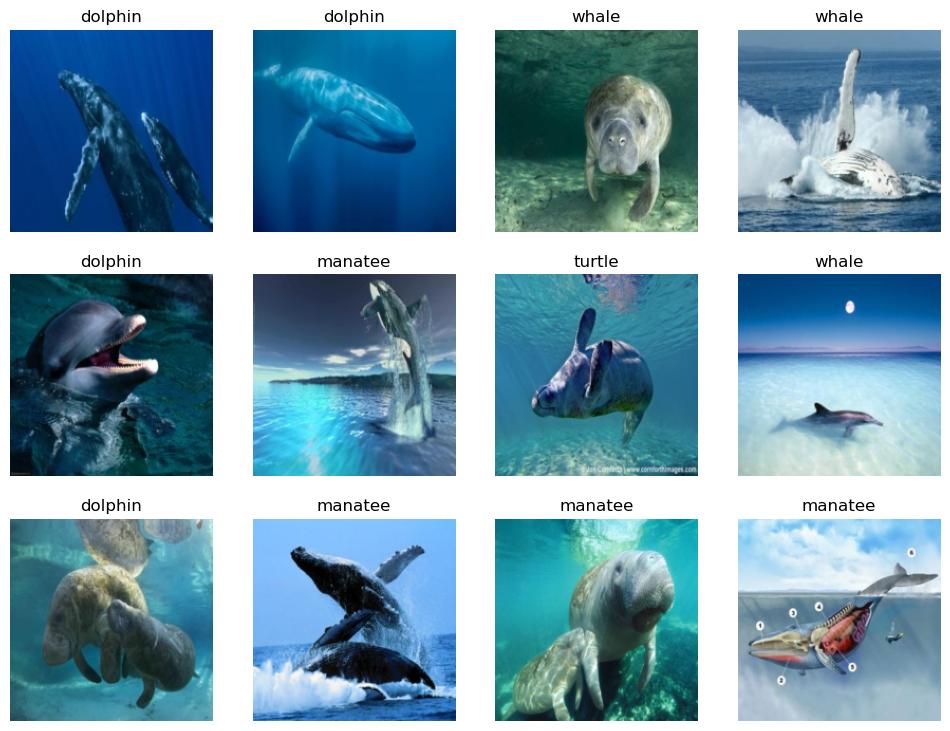

In [71]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)